In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rasterio

In [6]:
#Import required modules
import rasterio as rio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt


In [7]:
#Set water unit weigth
"Parameters"
GammaW   = 9.81

In [8]:
#Folder for inputs and outputs
ruta_in='/content/drive/Shared drives/ETCRS/SHALSTAB/COLAB/llanogrande/Insumos/'
ruta_out='/content/drive/Shared drives/ETCRS/SHALSTAB/COLAB/llanogrande/Resultados/'

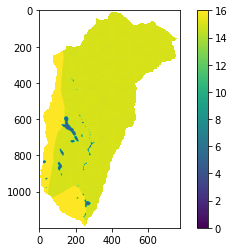

In [10]:
#Importar raster de entrada
raster = rio.open(ruta_in+'cohesion.tif')
cohesion=raster.read(1)
cohesion=np.where(cohesion==cohesion[0,0],np.nan,cohesion)
plt.imshow(cohesion)
plt.colorbar();

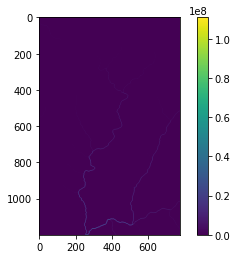

In [41]:
raster = rio.open(ruta_in+'Aacc_LlanoGrande.tif')
flujo=raster.read(1)
#flujo=np.where(flujo==flujo[0,0],np.nan,flujo)
plt.imshow(flujo)
plt.colorbar()

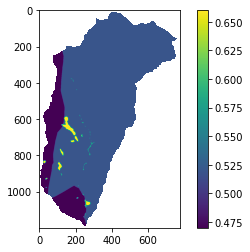

In [14]:
raster = rio.open(ruta_in+'phyrad.tif')
friccion=raster.read(1)
friccion=np.where(friccion==friccion[0,0],np.nan,friccion) #ya py lee los nans
plt.imshow(friccion)
plt.colorbar()

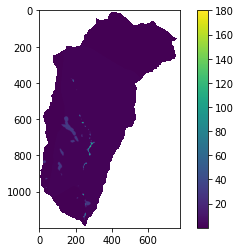

In [16]:
raster = rio.open(ruta_in+'permeabilidad.tif')
ks=raster.read(1)
ks[0,0]
ks=np.where(ks==ks[0,0],np.nan,ks)
plt.imshow(ks)
plt.colorbar();


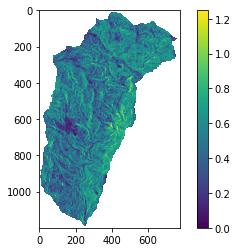

In [17]:
raster = rio.open(ruta_in+'pendienterad.tif')
pendiente=raster.read(1)
pendiente=np.where(pendiente==pendiente[0,0],np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();



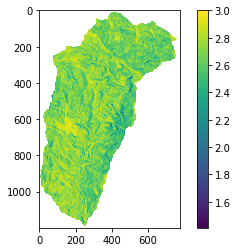

In [37]:
raster = rio.open(ruta_in+'espesor.tif')
espesor=raster.read(1)
espesor=np.where(espesor==espesor[0,0],np.nan,espesor)
plt.imshow(espesor)
plt.colorbar()



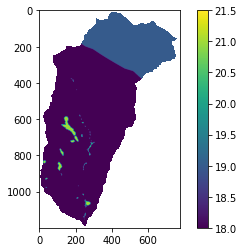

In [19]:
raster = rio.open(ruta_in+'gamma.tif')
peso=raster.read(1)
peso=np.where(peso==peso[0,0],np.nan,peso)
plt.imshow(peso)
plt.colorbar();

In [34]:
#"Reading the calibration parameters and FS"
with open(ruta_in + 'calibration.txt','r') as splitfile:
	data_cali = [line.split() for line in splitfile]

R1 = float(data_cali[10][0])
R2 = float(data_cali[13][0])
R3 = float(data_cali[16][0])
R4 = float(data_cali[19][0])
R5 = float(data_cali[22][0])
q  = float(data_cali[25][0])
q

80.0

In [35]:
"others"
dx = 12.5

In [38]:
"Applying corretion factors"

ks       = ks       * R1 
cohesion = cohesion * R2
friccion = friccion * R3
espesor  = espesor  * R4
peso     = peso     * R5

In [42]:
"STABILITY ANALYSIS"

MatEst = np.zeros(raster.shape)
Matq   = np.zeros(raster.shape)

M4=flujo/dx
M5=((0.01 * ks * (espesor * np.cos(pendiente)) * np.sin(pendiente)) / (0.001*q)) * ((peso / GammaW) * (1 - np.tan(pendiente) / np.tan(friccion)) + (cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))) 
MatEst1=np.where(M4>M5,3,MatEst) #  unstable

M6=((0.01 * ks * (espesor * np.cos(pendiente)) * np.sin(pendiente)) / (0.001*q)) * ((peso / GammaW) * (1 - np.tan(pendiente) / np.tan(friccion)) + (cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))) 
MatEst2=np.where(M4<=M6,4,MatEst1) # Stable

M1=np.tan(pendiente)
M2=(1 - (GammaW/peso)) * np.tan(friccion) + (cohesion / (peso * espesor * np.cos(pendiente)**2))
MatEst3  =np.where(M1<M2,1,MatEst2) # Unconditionally stable
	
M3=np.tan(friccion) + (cohesion / (peso * espesor * np.cos(pendiente)**2))
MatEst4  =  np.where(M1>=M3,2,MatEst3) # Unconditionally Unstable

Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * ((peso / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))
np.nanmin(Matq)

MatEst=np.where(MatEst4 == 0, np.nan,MatEst4)
Matq=np.where(Matq==np.inf,np.nanmax(Matq[Matq!=np.inf]),Matq)

Matq = np.where(M1<M2,-1,np.where(M1>=M3,-2,Matq))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less_equal
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26:

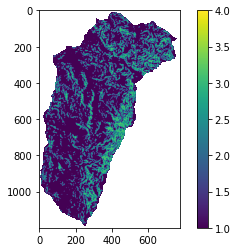

In [43]:
plt.imshow(MatEst)
plt.colorbar()

In [44]:
np.unique(MatEst)

array([ 1.,  2.,  3., ..., nan, nan, nan])

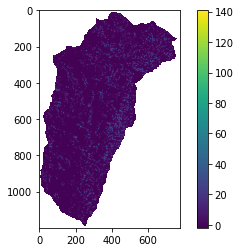

In [45]:
plt.imshow(Matq)
plt.colorbar()

In [46]:
#Para exportar
with rio.open(ruta_out+'MatEst.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(MatEst,1)

In [ ]:
with rio.open(ruta_out+'Matq.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(Matq,1)    

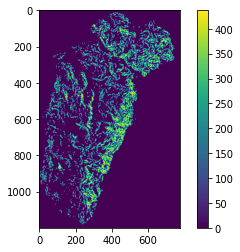

In [ ]:
Vol = np.where(np.logical_or(MatEst==2, MatEst==3), espesor*12.5*12.5, 0)

with rio.open(ruta_out+'Vol.tif', 'w', 
              driver='Gtiff',height=raster.shape[0],width=raster.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster.crs,transform=raster.transform) as dst:
    dst.write(Vol_10Tr_78,1) 

plt.imshow(Vol_10Tr_78)
plt.colorbar()
